In [140]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xml.etree.ElementTree as ET
import sklearn
import itertools
import scipy
import csv
import matplotlib.pyplot as plt
%matplotlib inline


import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, Dropout, MaxPool2D, Input, Softmax, Activation, Flatten
from keras.models import Model
from keras import optimizers
from keras.layers import concatenate,AveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

In [141]:

import pandas as pd
import numpy as np
import os
import cv2
from glob import glob
from keras.utils import Sequence
from keras.utils import to_categorical
from keras.preprocessing import image as k_image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
print(os.listdir('D:/blood-cells/dataset-master'))
print(os.listdir('D:/blood-cells/dataset2-master'))

['.DS_Store', 'Annotations', 'JPEGImages', 'labels.csv']
['.DS_Store', 'images', 'labels.csv']


In [142]:
dict_characters = {1:'NEUTROPHIL',2:'EOSINOPHIL',3:'MONOCYTE',4:'LYMPHOCYTE'}
dict_characters2 = {0:'Mononuclear',1:'Polynuclear'}

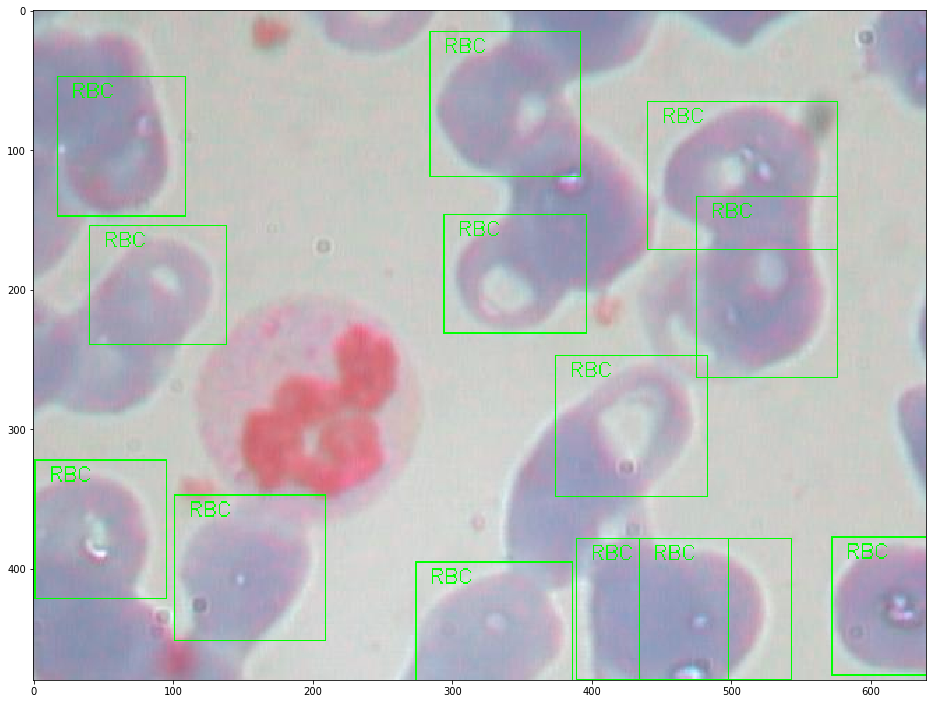

In [143]:
image = cv2.imread("D:/blood-cells/dataset-master/JPEGImages/BloodImage_00022.jpg")
tree = ET.parse("D:/blood-cells/dataset-master/Annotations/BloodImage_00022.xml")
for elem in tree.iter():
    if 'object' in elem.tag or 'part' in elem.tag:
        for attr in list(elem):
            if 'name' in attr.tag:
                name = attr.text
            if 'bndbox' in attr.tag:
                for dim in list(attr):
                    if 'xmin' in dim.tag:
                        xmin = int(round(float(dim.text)))
                    if 'ymin' in dim.tag:
                        ymin = int(round(float(dim.text)))
                    if 'xmax' in dim.tag:
                        xmax = int(round(float(dim.text)))
                    if 'ymax' in dim.tag:
                        ymax = int(round(float(dim.text)))
                if name[0] == "R":
                    cv2.rectangle(image, (xmin, ymin),
                                (xmax, ymax), (0, 255, 0), 1)
                    cv2.putText(image, name, (xmin + 10, ymin + 15),
                            cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (0, 255, 0), 1)
                if name[0] == "W":
                    cv2.rectangle(image, (xmin, ymin),
                                (xmax, ymax), (0, 0, 255), 1)
                    cv2.putText(image, name, (xmin + 10, ymin + 15),
                            cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (0, 0, 255), 1)
                if name[0] == "P":
                    cv2.rectangle(image, (xmin, ymin),
                                (xmax, ymax), (255, 0, 0), 1)
                    cv2.putText(image, name, (xmin + 10, ymin + 15),
                            cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (255, 0, 0), 1)
plt.figure(figsize=(16,16))
plt.imshow(image)
plt.show()

In [144]:
# Plot Image
def plotImage(image_location):
    image = cv2.imread(image_name)
    plt.imshow(image)
    return

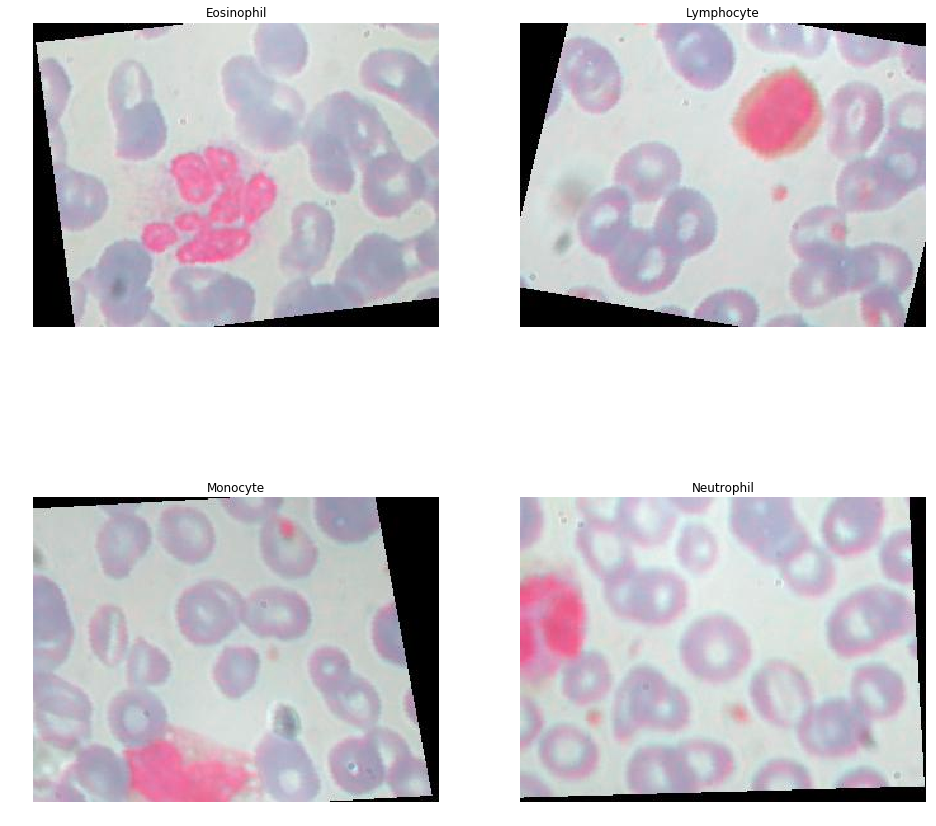

In [145]:
image_name = 'D:/blood-cells/dataset2-master/images/TRAIN/EOSINOPHIL/_0_207.jpeg'
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.title('Eosinophil')
plt.axis('off') 
plotImage(image_name)
image_name = 'D:/blood-cells/dataset2-master/images/TRAIN/LYMPHOCYTE/_0_204.jpeg'
plt.subplot(222)
plt.title('Lymphocyte')
plt.axis('off') 
plotImage(image_name)
image_name = 'D:/blood-cells/dataset2-master/images/TRAIN/MONOCYTE/_0_180.jpeg'
plt.subplot(223)
plt.title('Monocyte')
plt.axis('off') 
plotImage(image_name)
plt.subplot(224)
image_name = 'D:/blood-cells/dataset2-master/images/TRAIN/NEUTROPHIL/_0_292.jpeg'
plt.title('Neutrophil')
plt.axis('off') 
plotImage(image_name)

In [146]:
from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    z = []
    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL']:
                label = 1
                label2 = 1
            elif wbc_type in ['EOSINOPHIL']:
                label = 2
                label2 = 1
            elif wbc_type in ['MONOCYTE']:
                label = 3  
                label2 = 0
            elif wbc_type in ['LYMPHOCYTE']:
                label = 4 
                label2 = 0
            else:
                label = 5
                label2 = 0
            for image_filename in tqdm(os.listdir(folder + wbc_type)):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    img_file = scipy.misc.imresize(arr=img_file, size=(60, 80, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
                    z.append(label2)
    X = np.asarray(X)
    y = np.asarray(y)
    z = np.asarray(z)
    return X,y,z
X_test, y_test, z_test = get_data('D:/blood-cells/dataset2-master/images/TRAIN/')
X_train, y_train, z_train = get_data('D:/blood-cells/dataset2-master/images/TEST/')
# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 5)
y_testHot = to_categorical(y_test, num_classes = 5)
z_trainHot = to_categorical(z_train, num_classes = 2)
z_testHot = to_categorical(z_test, num_classes = 2)
print(dict_characters)
print(dict_characters2)

  0%|          | 0/2497 [00:00<?, ?it/s]D:\anaconda file\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
100%|██████████| 624/624 [00:01<00:00, 405.02it/s]


{1: 'NEUTROPHIL', 2: 'EOSINOPHIL', 3: 'MONOCYTE', 4: 'LYMPHOCYTE'}
{0: 'Mononuclear', 1: 'Polynuclear'}


In [166]:
print("Train X Shape --> ",X_train.shape)
print("Train y Shape --> ",y_trainHot.shape)
print("Train z Shape --> ",z_trainHot.shape)

Train X Shape -->  (2487, 60, 80, 3)
Train y Shape -->  (2487, 5)
Train z Shape -->  (2487, 2)


{1: 'NEUTROPHIL', 2: 'EOSINOPHIL', 3: 'MONOCYTE', 4: 'LYMPHOCYTE'}


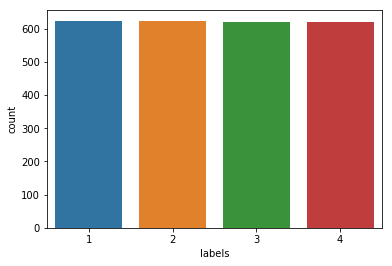

In [148]:
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_train

lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

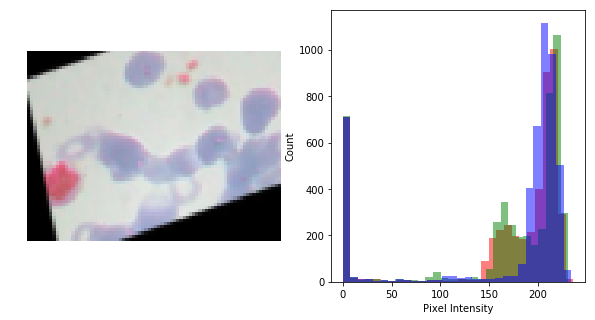

In [149]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X_train[1])

In [ ]:
b_dir = "D:/blood-cells/dataset2-master/images/"
def load_images(folder):
  dir = b_dir + folder
  images = []
  for folders in tqdm(os.listdir(dir)):
    for files in os.listdir(os.path.join(os.path.join(dir,folders))):
      #print(files,folders)
      filepath = os.path.join(os.path.join(dir,folders),files)
      img = cv2.imread(filepath)
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      img = cv2.resize(img,(32,24))
      #img = np.asarray(img)
      img = img/255.
      images.append((img,folders))
  return images

In [151]:
train = load_images('TRAIN')
test = load_images('TEST')
val = load_images('TEST_SIMPLE')

100%|██████████| 4/4 [00:00<00:00, 45.67it/s]


In [152]:
def create_dataset(data):
  x = []
  y = []
  for obj in data:
    x.append(obj[0])
    y.append(obj[1])
  x = np.array(x)
  y = np.array(y)
  return x,y

In [153]:
x_train,y_train = create_dataset(train)
x_test,y_test = create_dataset(test)
x_val,y_val = create_dataset(val)
del train
del val
del test

In [154]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_enc_train = encoder.fit_transform(y_train)
y_enc_test = encoder.transform(y_test)
y_enc_val = encoder.transform(y_val)

In [155]:
from keras.utils import to_categorical
y_cat_train = to_categorical(y_enc_train,4)
y_cat_test = to_categorical(y_enc_test,4)
y_cat_val = to_categorical(y_enc_val,4)

In [156]:
 import keras

In [157]:
batch_size = 128
epochs = 100

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(24,32,3),strides=2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [158]:
model.fit(x_train,y_cat_train,batch_size,epochs ,validation_data=(x_test,y_cat_test))

Train on 9957 samples, validate on 2487 samples
Epoch 1/100
9957/9957 [==============================] - ETA: 50s - loss: 1.4418 - acc: 0.23 - ETA: 29s - loss: 1.4393 - acc: 0.21 - ETA: 22s - loss: 1.4305 - acc: 0.23 - ETA: 18s - loss: 1.4222 - acc: 0.23 - ETA: 16s - loss: 1.4151 - acc: 0.25 - ETA: 14s - loss: 1.4150 - acc: 0.24 - ETA: 13s - loss: 1.4125 - acc: 0.25 - ETA: 12s - loss: 1.4077 - acc: 0.25 - ETA: 12s - loss: 1.4055 - acc: 0.25 - ETA: 11s - loss: 1.4061 - acc: 0.24 - ETA: 10s - loss: 1.4038 - acc: 0.24 - ETA: 10s - loss: 1.4024 - acc: 0.24 - ETA: 10s - loss: 1.4015 - acc: 0.24 - ETA: 9s - loss: 1.4006 - acc: 0.2472 - ETA: 9s - loss: 1.3993 - acc: 0.250 - ETA: 9s - loss: 1.3993 - acc: 0.247 - ETA: 8s - loss: 1.3990 - acc: 0.244 - ETA: 8s - loss: 1.3981 - acc: 0.248 - ETA: 8s - loss: 1.3981 - acc: 0.247 - ETA: 8s - loss: 1.3977 - acc: 0.246 - ETA: 7s - loss: 1.3968 - acc: 0.250 - ETA: 7s - loss: 1.3964 - acc: 0.250 - ETA: 7s - loss: 1.3958 - acc: 0.251 - ETA: 7s - loss: 1.39

9957/9957 [==============================] - ETA: 7s - loss: 1.3175 - acc: 0.406 - ETA: 8s - loss: 1.3303 - acc: 0.351 - ETA: 8s - loss: 1.3225 - acc: 0.346 - ETA: 8s - loss: 1.3113 - acc: 0.373 - ETA: 8s - loss: 1.3043 - acc: 0.375 - ETA: 7s - loss: 1.2993 - acc: 0.378 - ETA: 7s - loss: 1.2972 - acc: 0.387 - ETA: 7s - loss: 1.2962 - acc: 0.388 - ETA: 7s - loss: 1.2914 - acc: 0.389 - ETA: 7s - loss: 1.2937 - acc: 0.386 - ETA: 7s - loss: 1.2938 - acc: 0.386 - ETA: 7s - loss: 1.2894 - acc: 0.390 - ETA: 7s - loss: 1.2856 - acc: 0.391 - ETA: 7s - loss: 1.2841 - acc: 0.392 - ETA: 7s - loss: 1.2825 - acc: 0.394 - ETA: 6s - loss: 1.2843 - acc: 0.390 - ETA: 6s - loss: 1.2849 - acc: 0.389 - ETA: 6s - loss: 1.2837 - acc: 0.393 - ETA: 6s - loss: 1.2861 - acc: 0.390 - ETA: 6s - loss: 1.2854 - acc: 0.389 - ETA: 6s - loss: 1.2855 - acc: 0.389 - ETA: 6s - loss: 1.2889 - acc: 0.386 - ETA: 6s - loss: 1.2910 - acc: 0.384 - ETA: 6s - loss: 1.2892 - acc: 0.388 - ETA: 5s - loss: 1.2888 - acc: 0.388 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 1.0195 - acc: 0.507 - ETA: 8s - loss: 1.0542 - acc: 0.500 - ETA: 8s - loss: 1.0727 - acc: 0.479 - ETA: 8s - loss: 1.0781 - acc: 0.488 - ETA: 8s - loss: 1.0678 - acc: 0.482 - ETA: 8s - loss: 1.0582 - acc: 0.492 - ETA: 7s - loss: 1.0756 - acc: 0.487 - ETA: 7s - loss: 1.0743 - acc: 0.488 - ETA: 7s - loss: 1.0742 - acc: 0.489 - ETA: 7s - loss: 1.0741 - acc: 0.488 - ETA: 7s - loss: 1.0738 - acc: 0.492 - ETA: 7s - loss: 1.0738 - acc: 0.496 - ETA: 7s - loss: 1.0677 - acc: 0.503 - ETA: 7s - loss: 1.0616 - acc: 0.510 - ETA: 7s - loss: 1.0636 - acc: 0.507 - ETA: 6s - loss: 1.0690 - acc: 0.502 - ETA: 6s - loss: 1.0681 - acc: 0.507 - ETA: 6s - loss: 1.0701 - acc: 0.503 - ETA: 6s - loss: 1.0732 - acc: 0.504 - ETA: 6s - loss: 1.0731 - acc: 0.502 - ETA: 6s - loss: 1.0691 - acc: 0.504 - ETA: 6s - loss: 1.0708 - acc: 0.501 - ETA: 6s - loss: 1.0737 - acc: 0.500 - ETA: 6s - loss: 1.0745 - acc: 0.501 - ETA: 5s - loss: 1.0757 - acc: 0.501 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 1.0635 - acc: 0.539 - ETA: 8s - loss: 0.9745 - acc: 0.609 - ETA: 8s - loss: 0.9680 - acc: 0.599 - ETA: 8s - loss: 0.9824 - acc: 0.580 - ETA: 8s - loss: 0.9831 - acc: 0.575 - ETA: 8s - loss: 0.9672 - acc: 0.589 - ETA: 7s - loss: 0.9607 - acc: 0.596 - ETA: 7s - loss: 0.9605 - acc: 0.606 - ETA: 7s - loss: 0.9550 - acc: 0.605 - ETA: 7s - loss: 0.9484 - acc: 0.602 - ETA: 7s - loss: 0.9411 - acc: 0.608 - ETA: 7s - loss: 0.9308 - acc: 0.612 - ETA: 7s - loss: 0.9302 - acc: 0.607 - ETA: 7s - loss: 0.9247 - acc: 0.607 - ETA: 6s - loss: 0.9227 - acc: 0.608 - ETA: 6s - loss: 0.9238 - acc: 0.605 - ETA: 6s - loss: 0.9247 - acc: 0.604 - ETA: 6s - loss: 0.9180 - acc: 0.605 - ETA: 6s - loss: 0.9174 - acc: 0.605 - ETA: 6s - loss: 0.9170 - acc: 0.605 - ETA: 6s - loss: 0.9164 - acc: 0.607 - ETA: 6s - loss: 0.9144 - acc: 0.606 - ETA: 6s - loss: 0.9115 - acc: 0.607 - ETA: 5s - loss: 0.9083 - acc: 0.608 - ETA: 5s - loss: 0.9090 - acc: 0.606 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.8484 - acc: 0.632 - ETA: 7s - loss: 0.8278 - acc: 0.652 - ETA: 7s - loss: 0.8103 - acc: 0.666 - ETA: 7s - loss: 0.8068 - acc: 0.658 - ETA: 7s - loss: 0.8056 - acc: 0.662 - ETA: 7s - loss: 0.8080 - acc: 0.658 - ETA: 7s - loss: 0.8107 - acc: 0.652 - ETA: 7s - loss: 0.8164 - acc: 0.645 - ETA: 7s - loss: 0.8109 - acc: 0.650 - ETA: 7s - loss: 0.8113 - acc: 0.651 - ETA: 7s - loss: 0.8118 - acc: 0.647 - ETA: 7s - loss: 0.8097 - acc: 0.643 - ETA: 7s - loss: 0.8048 - acc: 0.647 - ETA: 7s - loss: 0.8091 - acc: 0.645 - ETA: 6s - loss: 0.8059 - acc: 0.646 - ETA: 6s - loss: 0.8058 - acc: 0.645 - ETA: 6s - loss: 0.8027 - acc: 0.647 - ETA: 6s - loss: 0.8017 - acc: 0.648 - ETA: 6s - loss: 0.8011 - acc: 0.648 - ETA: 6s - loss: 0.8054 - acc: 0.649 - ETA: 6s - loss: 0.8040 - acc: 0.648 - ETA: 6s - loss: 0.7991 - acc: 0.651 - ETA: 6s - loss: 0.7987 - acc: 0.649 - ETA: 6s - loss: 0.8013 - acc: 0.648 - ETA: 5s - loss: 0.7980 - acc: 0.651 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.7397 - acc: 0.695 - ETA: 8s - loss: 0.7630 - acc: 0.652 - ETA: 8s - loss: 0.7577 - acc: 0.656 - ETA: 8s - loss: 0.7446 - acc: 0.654 - ETA: 8s - loss: 0.7297 - acc: 0.665 - ETA: 7s - loss: 0.7204 - acc: 0.670 - ETA: 7s - loss: 0.7111 - acc: 0.675 - ETA: 7s - loss: 0.7195 - acc: 0.671 - ETA: 7s - loss: 0.7160 - acc: 0.682 - ETA: 7s - loss: 0.7133 - acc: 0.685 - ETA: 7s - loss: 0.7140 - acc: 0.684 - ETA: 7s - loss: 0.7076 - acc: 0.687 - ETA: 7s - loss: 0.7023 - acc: 0.691 - ETA: 7s - loss: 0.7051 - acc: 0.688 - ETA: 7s - loss: 0.7076 - acc: 0.689 - ETA: 6s - loss: 0.7042 - acc: 0.690 - ETA: 6s - loss: 0.7078 - acc: 0.688 - ETA: 6s - loss: 0.7062 - acc: 0.688 - ETA: 6s - loss: 0.6997 - acc: 0.694 - ETA: 6s - loss: 0.6972 - acc: 0.694 - ETA: 6s - loss: 0.6998 - acc: 0.693 - ETA: 6s - loss: 0.7047 - acc: 0.694 - ETA: 6s - loss: 0.7004 - acc: 0.696 - ETA: 5s - loss: 0.6959 - acc: 0.700 - ETA: 5s - loss: 0.6961 - acc: 0.699 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.6164 - acc: 0.710 - ETA: 7s - loss: 0.6228 - acc: 0.730 - ETA: 8s - loss: 0.6523 - acc: 0.697 - ETA: 7s - loss: 0.6416 - acc: 0.697 - ETA: 7s - loss: 0.6197 - acc: 0.729 - ETA: 7s - loss: 0.6183 - acc: 0.725 - ETA: 7s - loss: 0.6077 - acc: 0.729 - ETA: 7s - loss: 0.6073 - acc: 0.735 - ETA: 7s - loss: 0.6093 - acc: 0.733 - ETA: 7s - loss: 0.6050 - acc: 0.734 - ETA: 7s - loss: 0.6034 - acc: 0.733 - ETA: 7s - loss: 0.6062 - acc: 0.732 - ETA: 7s - loss: 0.6200 - acc: 0.727 - ETA: 7s - loss: 0.6303 - acc: 0.724 - ETA: 6s - loss: 0.6352 - acc: 0.722 - ETA: 6s - loss: 0.6351 - acc: 0.725 - ETA: 6s - loss: 0.6362 - acc: 0.724 - ETA: 6s - loss: 0.6392 - acc: 0.723 - ETA: 6s - loss: 0.6391 - acc: 0.722 - ETA: 6s - loss: 0.6408 - acc: 0.721 - ETA: 6s - loss: 0.6382 - acc: 0.724 - ETA: 6s - loss: 0.6417 - acc: 0.723 - ETA: 6s - loss: 0.6423 - acc: 0.725 - ETA: 6s - loss: 0.6457 - acc: 0.723 - ETA: 6s - loss: 0.6436 - acc: 0.725 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.6694 - acc: 0.718 - ETA: 8s - loss: 0.6846 - acc: 0.730 - ETA: 8s - loss: 0.6313 - acc: 0.739 - ETA: 8s - loss: 0.6451 - acc: 0.730 - ETA: 8s - loss: 0.6433 - acc: 0.731 - ETA: 8s - loss: 0.6393 - acc: 0.733 - ETA: 8s - loss: 0.6331 - acc: 0.737 - ETA: 7s - loss: 0.6441 - acc: 0.726 - ETA: 7s - loss: 0.6421 - acc: 0.730 - ETA: 7s - loss: 0.6533 - acc: 0.728 - ETA: 7s - loss: 0.6468 - acc: 0.732 - ETA: 7s - loss: 0.6472 - acc: 0.731 - ETA: 7s - loss: 0.6370 - acc: 0.739 - ETA: 7s - loss: 0.6381 - acc: 0.737 - ETA: 7s - loss: 0.6379 - acc: 0.735 - ETA: 6s - loss: 0.6401 - acc: 0.731 - ETA: 6s - loss: 0.6410 - acc: 0.730 - ETA: 6s - loss: 0.6369 - acc: 0.734 - ETA: 6s - loss: 0.6336 - acc: 0.736 - ETA: 6s - loss: 0.6335 - acc: 0.737 - ETA: 6s - loss: 0.6295 - acc: 0.737 - ETA: 6s - loss: 0.6313 - acc: 0.734 - ETA: 6s - loss: 0.6324 - acc: 0.732 - ETA: 6s - loss: 0.6309 - acc: 0.734 - ETA: 5s - loss: 0.6299 - acc: 0.734 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.5290 - acc: 0.820 - ETA: 8s - loss: 0.5319 - acc: 0.816 - ETA: 8s - loss: 0.5183 - acc: 0.822 - ETA: 8s - loss: 0.5452 - acc: 0.804 - ETA: 8s - loss: 0.5519 - acc: 0.790 - ETA: 8s - loss: 0.5435 - acc: 0.793 - ETA: 7s - loss: 0.5519 - acc: 0.784 - ETA: 7s - loss: 0.5504 - acc: 0.779 - ETA: 7s - loss: 0.5478 - acc: 0.776 - ETA: 7s - loss: 0.5456 - acc: 0.778 - ETA: 7s - loss: 0.5425 - acc: 0.780 - ETA: 7s - loss: 0.5429 - acc: 0.773 - ETA: 7s - loss: 0.5438 - acc: 0.772 - ETA: 7s - loss: 0.5450 - acc: 0.772 - ETA: 7s - loss: 0.5387 - acc: 0.777 - ETA: 7s - loss: 0.5362 - acc: 0.780 - ETA: 6s - loss: 0.5320 - acc: 0.783 - ETA: 6s - loss: 0.5348 - acc: 0.781 - ETA: 6s - loss: 0.5376 - acc: 0.778 - ETA: 6s - loss: 0.5399 - acc: 0.777 - ETA: 6s - loss: 0.5453 - acc: 0.775 - ETA: 6s - loss: 0.5469 - acc: 0.773 - ETA: 6s - loss: 0.5439 - acc: 0.774 - ETA: 6s - loss: 0.5455 - acc: 0.775 - ETA: 6s - loss: 0.5446 - acc: 0.774 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.5444 - acc: 0.710 - ETA: 7s - loss: 0.5739 - acc: 0.738 - ETA: 7s - loss: 0.5404 - acc: 0.760 - ETA: 7s - loss: 0.5315 - acc: 0.769 - ETA: 7s - loss: 0.5075 - acc: 0.781 - ETA: 7s - loss: 0.5027 - acc: 0.783 - ETA: 7s - loss: 0.5321 - acc: 0.769 - ETA: 7s - loss: 0.5387 - acc: 0.770 - ETA: 7s - loss: 0.5377 - acc: 0.770 - ETA: 7s - loss: 0.5410 - acc: 0.768 - ETA: 7s - loss: 0.5388 - acc: 0.768 - ETA: 7s - loss: 0.5347 - acc: 0.771 - ETA: 7s - loss: 0.5323 - acc: 0.775 - ETA: 6s - loss: 0.5380 - acc: 0.776 - ETA: 6s - loss: 0.5350 - acc: 0.776 - ETA: 6s - loss: 0.5365 - acc: 0.774 - ETA: 6s - loss: 0.5332 - acc: 0.774 - ETA: 6s - loss: 0.5320 - acc: 0.774 - ETA: 6s - loss: 0.5310 - acc: 0.774 - ETA: 6s - loss: 0.5309 - acc: 0.776 - ETA: 6s - loss: 0.5292 - acc: 0.776 - ETA: 6s - loss: 0.5285 - acc: 0.775 - ETA: 6s - loss: 0.5262 - acc: 0.776 - ETA: 6s - loss: 0.5265 - acc: 0.775 - ETA: 5s - loss: 0.5283 - acc: 0.775 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.4910 - acc: 0.820 - ETA: 8s - loss: 0.4955 - acc: 0.800 - ETA: 8s - loss: 0.5417 - acc: 0.765 - ETA: 8s - loss: 0.5421 - acc: 0.765 - ETA: 8s - loss: 0.5348 - acc: 0.775 - ETA: 8s - loss: 0.5364 - acc: 0.779 - ETA: 7s - loss: 0.5244 - acc: 0.785 - ETA: 7s - loss: 0.5160 - acc: 0.791 - ETA: 7s - loss: 0.5003 - acc: 0.801 - ETA: 7s - loss: 0.4913 - acc: 0.805 - ETA: 7s - loss: 0.4885 - acc: 0.806 - ETA: 7s - loss: 0.4814 - acc: 0.809 - ETA: 7s - loss: 0.4820 - acc: 0.806 - ETA: 7s - loss: 0.4807 - acc: 0.806 - ETA: 7s - loss: 0.4809 - acc: 0.806 - ETA: 7s - loss: 0.4750 - acc: 0.807 - ETA: 6s - loss: 0.4785 - acc: 0.807 - ETA: 6s - loss: 0.4781 - acc: 0.809 - ETA: 6s - loss: 0.4803 - acc: 0.807 - ETA: 6s - loss: 0.4789 - acc: 0.807 - ETA: 6s - loss: 0.4751 - acc: 0.809 - ETA: 6s - loss: 0.4723 - acc: 0.811 - ETA: 6s - loss: 0.4724 - acc: 0.811 - ETA: 6s - loss: 0.4731 - acc: 0.812 - ETA: 5s - loss: 0.4728 - acc: 0.810 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.5573 - acc: 0.789 - ETA: 8s - loss: 0.5338 - acc: 0.789 - ETA: 8s - loss: 0.5184 - acc: 0.786 - ETA: 8s - loss: 0.4818 - acc: 0.802 - ETA: 8s - loss: 0.4602 - acc: 0.815 - ETA: 8s - loss: 0.4638 - acc: 0.804 - ETA: 8s - loss: 0.4606 - acc: 0.801 - ETA: 7s - loss: 0.4544 - acc: 0.804 - ETA: 7s - loss: 0.4488 - acc: 0.809 - ETA: 7s - loss: 0.4429 - acc: 0.814 - ETA: 7s - loss: 0.4415 - acc: 0.813 - ETA: 7s - loss: 0.4456 - acc: 0.812 - ETA: 7s - loss: 0.4409 - acc: 0.813 - ETA: 7s - loss: 0.4380 - acc: 0.817 - ETA: 7s - loss: 0.4364 - acc: 0.821 - ETA: 7s - loss: 0.4349 - acc: 0.823 - ETA: 6s - loss: 0.4357 - acc: 0.824 - ETA: 6s - loss: 0.4438 - acc: 0.821 - ETA: 6s - loss: 0.4458 - acc: 0.820 - ETA: 6s - loss: 0.4461 - acc: 0.819 - ETA: 6s - loss: 0.4424 - acc: 0.822 - ETA: 6s - loss: 0.4451 - acc: 0.822 - ETA: 6s - loss: 0.4427 - acc: 0.824 - ETA: 6s - loss: 0.4431 - acc: 0.823 - ETA: 6s - loss: 0.4435 - acc: 0.821 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.4505 - acc: 0.781 - ETA: 8s - loss: 0.4242 - acc: 0.808 - ETA: 8s - loss: 0.4319 - acc: 0.796 - ETA: 8s - loss: 0.4124 - acc: 0.810 - ETA: 8s - loss: 0.4156 - acc: 0.812 - ETA: 8s - loss: 0.4358 - acc: 0.802 - ETA: 7s - loss: 0.4365 - acc: 0.803 - ETA: 7s - loss: 0.4408 - acc: 0.802 - ETA: 7s - loss: 0.4556 - acc: 0.797 - ETA: 7s - loss: 0.4623 - acc: 0.793 - ETA: 7s - loss: 0.4626 - acc: 0.794 - ETA: 7s - loss: 0.4595 - acc: 0.796 - ETA: 7s - loss: 0.4627 - acc: 0.796 - ETA: 7s - loss: 0.4620 - acc: 0.794 - ETA: 7s - loss: 0.4570 - acc: 0.799 - ETA: 6s - loss: 0.4616 - acc: 0.797 - ETA: 6s - loss: 0.4601 - acc: 0.798 - ETA: 6s - loss: 0.4613 - acc: 0.799 - ETA: 6s - loss: 0.4632 - acc: 0.800 - ETA: 6s - loss: 0.4606 - acc: 0.803 - ETA: 6s - loss: 0.4620 - acc: 0.801 - ETA: 6s - loss: 0.4662 - acc: 0.799 - ETA: 6s - loss: 0.4648 - acc: 0.803 - ETA: 6s - loss: 0.4653 - acc: 0.802 - ETA: 5s - loss: 0.4609 - acc: 0.803 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.4735 - acc: 0.804 - ETA: 8s - loss: 0.4670 - acc: 0.796 - ETA: 8s - loss: 0.4508 - acc: 0.809 - ETA: 8s - loss: 0.4653 - acc: 0.810 - ETA: 7s - loss: 0.4387 - acc: 0.817 - ETA: 7s - loss: 0.4352 - acc: 0.821 - ETA: 7s - loss: 0.4241 - acc: 0.830 - ETA: 7s - loss: 0.4139 - acc: 0.832 - ETA: 7s - loss: 0.4171 - acc: 0.832 - ETA: 7s - loss: 0.4142 - acc: 0.835 - ETA: 7s - loss: 0.4119 - acc: 0.833 - ETA: 7s - loss: 0.4160 - acc: 0.827 - ETA: 7s - loss: 0.4256 - acc: 0.819 - ETA: 7s - loss: 0.4220 - acc: 0.822 - ETA: 7s - loss: 0.4214 - acc: 0.819 - ETA: 7s - loss: 0.4290 - acc: 0.816 - ETA: 6s - loss: 0.4270 - acc: 0.818 - ETA: 6s - loss: 0.4296 - acc: 0.816 - ETA: 6s - loss: 0.4343 - acc: 0.812 - ETA: 6s - loss: 0.4423 - acc: 0.809 - ETA: 6s - loss: 0.4386 - acc: 0.811 - ETA: 6s - loss: 0.4372 - acc: 0.813 - ETA: 6s - loss: 0.4377 - acc: 0.811 - ETA: 6s - loss: 0.4400 - acc: 0.810 - ETA: 5s - loss: 0.4420 - acc: 0.810 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.4519 - acc: 0.804 - ETA: 8s - loss: 0.4718 - acc: 0.804 - ETA: 8s - loss: 0.4748 - acc: 0.812 - ETA: 8s - loss: 0.4563 - acc: 0.818 - ETA: 8s - loss: 0.4368 - acc: 0.829 - ETA: 8s - loss: 0.4327 - acc: 0.832 - ETA: 8s - loss: 0.4295 - acc: 0.833 - ETA: 7s - loss: 0.4213 - acc: 0.836 - ETA: 7s - loss: 0.4220 - acc: 0.838 - ETA: 7s - loss: 0.4064 - acc: 0.846 - ETA: 7s - loss: 0.4204 - acc: 0.838 - ETA: 7s - loss: 0.4229 - acc: 0.838 - ETA: 7s - loss: 0.4176 - acc: 0.841 - ETA: 7s - loss: 0.4149 - acc: 0.843 - ETA: 7s - loss: 0.4106 - acc: 0.843 - ETA: 6s - loss: 0.4080 - acc: 0.844 - ETA: 6s - loss: 0.4038 - acc: 0.844 - ETA: 6s - loss: 0.4027 - acc: 0.845 - ETA: 6s - loss: 0.4040 - acc: 0.842 - ETA: 6s - loss: 0.4037 - acc: 0.842 - ETA: 6s - loss: 0.4027 - acc: 0.842 - ETA: 6s - loss: 0.4000 - acc: 0.843 - ETA: 6s - loss: 0.3985 - acc: 0.845 - ETA: 6s - loss: 0.3974 - acc: 0.847 - ETA: 5s - loss: 0.3958 - acc: 0.847 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.3462 - acc: 0.843 - ETA: 7s - loss: 0.3818 - acc: 0.832 - ETA: 7s - loss: 0.3899 - acc: 0.830 - ETA: 7s - loss: 0.3905 - acc: 0.841 - ETA: 7s - loss: 0.3856 - acc: 0.840 - ETA: 7s - loss: 0.3950 - acc: 0.834 - ETA: 7s - loss: 0.3836 - acc: 0.841 - ETA: 7s - loss: 0.3831 - acc: 0.845 - ETA: 7s - loss: 0.3865 - acc: 0.845 - ETA: 7s - loss: 0.3826 - acc: 0.847 - ETA: 7s - loss: 0.3775 - acc: 0.852 - ETA: 7s - loss: 0.3783 - acc: 0.851 - ETA: 7s - loss: 0.3813 - acc: 0.848 - ETA: 7s - loss: 0.3820 - acc: 0.848 - ETA: 7s - loss: 0.3754 - acc: 0.851 - ETA: 6s - loss: 0.3808 - acc: 0.849 - ETA: 6s - loss: 0.3847 - acc: 0.847 - ETA: 6s - loss: 0.3824 - acc: 0.849 - ETA: 6s - loss: 0.3825 - acc: 0.848 - ETA: 6s - loss: 0.3854 - acc: 0.845 - ETA: 6s - loss: 0.3910 - acc: 0.841 - ETA: 6s - loss: 0.3898 - acc: 0.842 - ETA: 6s - loss: 0.3899 - acc: 0.840 - ETA: 6s - loss: 0.3878 - acc: 0.841 - ETA: 5s - loss: 0.3856 - acc: 0.842 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.4012 - acc: 0.820 - ETA: 8s - loss: 0.3706 - acc: 0.832 - ETA: 8s - loss: 0.3619 - acc: 0.835 - ETA: 8s - loss: 0.3567 - acc: 0.837 - ETA: 8s - loss: 0.3545 - acc: 0.842 - ETA: 8s - loss: 0.3335 - acc: 0.854 - ETA: 7s - loss: 0.3325 - acc: 0.854 - ETA: 7s - loss: 0.3273 - acc: 0.857 - ETA: 7s - loss: 0.3232 - acc: 0.860 - ETA: 7s - loss: 0.3255 - acc: 0.859 - ETA: 7s - loss: 0.3276 - acc: 0.858 - ETA: 7s - loss: 0.3382 - acc: 0.849 - ETA: 7s - loss: 0.3371 - acc: 0.851 - ETA: 7s - loss: 0.3316 - acc: 0.856 - ETA: 7s - loss: 0.3298 - acc: 0.857 - ETA: 6s - loss: 0.3277 - acc: 0.860 - ETA: 6s - loss: 0.3252 - acc: 0.864 - ETA: 6s - loss: 0.3308 - acc: 0.861 - ETA: 6s - loss: 0.3290 - acc: 0.863 - ETA: 6s - loss: 0.3320 - acc: 0.862 - ETA: 6s - loss: 0.3325 - acc: 0.862 - ETA: 6s - loss: 0.3359 - acc: 0.861 - ETA: 6s - loss: 0.3380 - acc: 0.861 - ETA: 6s - loss: 0.3362 - acc: 0.862 - ETA: 5s - loss: 0.3331 - acc: 0.864 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.2278 - acc: 0.945 - ETA: 8s - loss: 0.2701 - acc: 0.914 - ETA: 8s - loss: 0.2965 - acc: 0.890 - ETA: 8s - loss: 0.3151 - acc: 0.880 - ETA: 8s - loss: 0.3276 - acc: 0.871 - ETA: 7s - loss: 0.3266 - acc: 0.869 - ETA: 7s - loss: 0.3416 - acc: 0.859 - ETA: 7s - loss: 0.3401 - acc: 0.858 - ETA: 7s - loss: 0.3516 - acc: 0.849 - ETA: 7s - loss: 0.3517 - acc: 0.854 - ETA: 7s - loss: 0.3481 - acc: 0.855 - ETA: 7s - loss: 0.3443 - acc: 0.858 - ETA: 7s - loss: 0.3514 - acc: 0.853 - ETA: 7s - loss: 0.3529 - acc: 0.853 - ETA: 6s - loss: 0.3572 - acc: 0.850 - ETA: 6s - loss: 0.3558 - acc: 0.852 - ETA: 6s - loss: 0.3538 - acc: 0.853 - ETA: 6s - loss: 0.3491 - acc: 0.856 - ETA: 6s - loss: 0.3489 - acc: 0.856 - ETA: 6s - loss: 0.3459 - acc: 0.857 - ETA: 6s - loss: 0.3416 - acc: 0.858 - ETA: 6s - loss: 0.3411 - acc: 0.858 - ETA: 6s - loss: 0.3411 - acc: 0.859 - ETA: 5s - loss: 0.3420 - acc: 0.858 - ETA: 5s - loss: 0.3420 - acc: 0.858 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.2791 - acc: 0.906 - ETA: 8s - loss: 0.3013 - acc: 0.898 - ETA: 8s - loss: 0.2929 - acc: 0.893 - ETA: 8s - loss: 0.2815 - acc: 0.896 - ETA: 8s - loss: 0.3027 - acc: 0.895 - ETA: 7s - loss: 0.2911 - acc: 0.899 - ETA: 7s - loss: 0.2992 - acc: 0.885 - ETA: 7s - loss: 0.2982 - acc: 0.879 - ETA: 7s - loss: 0.2946 - acc: 0.881 - ETA: 7s - loss: 0.2902 - acc: 0.881 - ETA: 7s - loss: 0.2940 - acc: 0.880 - ETA: 7s - loss: 0.2981 - acc: 0.877 - ETA: 7s - loss: 0.2924 - acc: 0.879 - ETA: 7s - loss: 0.2957 - acc: 0.879 - ETA: 7s - loss: 0.2973 - acc: 0.880 - ETA: 6s - loss: 0.2977 - acc: 0.882 - ETA: 6s - loss: 0.2948 - acc: 0.883 - ETA: 6s - loss: 0.2930 - acc: 0.884 - ETA: 6s - loss: 0.2925 - acc: 0.884 - ETA: 6s - loss: 0.2923 - acc: 0.885 - ETA: 6s - loss: 0.2937 - acc: 0.886 - ETA: 6s - loss: 0.2947 - acc: 0.885 - ETA: 6s - loss: 0.2981 - acc: 0.885 - ETA: 6s - loss: 0.3004 - acc: 0.883 - ETA: 5s - loss: 0.3033 - acc: 0.882 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.2928 - acc: 0.937 - ETA: 8s - loss: 0.2678 - acc: 0.933 - ETA: 8s - loss: 0.2799 - acc: 0.914 - ETA: 8s - loss: 0.2839 - acc: 0.910 - ETA: 8s - loss: 0.2906 - acc: 0.896 - ETA: 8s - loss: 0.2699 - acc: 0.904 - ETA: 7s - loss: 0.2768 - acc: 0.904 - ETA: 7s - loss: 0.2797 - acc: 0.900 - ETA: 7s - loss: 0.2726 - acc: 0.904 - ETA: 7s - loss: 0.2763 - acc: 0.901 - ETA: 7s - loss: 0.2723 - acc: 0.902 - ETA: 7s - loss: 0.2750 - acc: 0.900 - ETA: 7s - loss: 0.2746 - acc: 0.899 - ETA: 7s - loss: 0.2736 - acc: 0.899 - ETA: 7s - loss: 0.2706 - acc: 0.900 - ETA: 6s - loss: 0.2749 - acc: 0.897 - ETA: 6s - loss: 0.2736 - acc: 0.899 - ETA: 6s - loss: 0.2767 - acc: 0.898 - ETA: 6s - loss: 0.2789 - acc: 0.897 - ETA: 6s - loss: 0.2797 - acc: 0.896 - ETA: 6s - loss: 0.2796 - acc: 0.895 - ETA: 6s - loss: 0.2785 - acc: 0.895 - ETA: 6s - loss: 0.2780 - acc: 0.896 - ETA: 6s - loss: 0.2785 - acc: 0.895 - ETA: 5s - loss: 0.2766 - acc: 0.895 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.2382 - acc: 0.914 - ETA: 8s - loss: 0.2502 - acc: 0.906 - ETA: 8s - loss: 0.2708 - acc: 0.903 - ETA: 8s - loss: 0.2737 - acc: 0.900 - ETA: 8s - loss: 0.2691 - acc: 0.901 - ETA: 8s - loss: 0.2568 - acc: 0.904 - ETA: 8s - loss: 0.2552 - acc: 0.905 - ETA: 7s - loss: 0.2454 - acc: 0.911 - ETA: 7s - loss: 0.2485 - acc: 0.909 - ETA: 7s - loss: 0.2492 - acc: 0.909 - ETA: 7s - loss: 0.2442 - acc: 0.911 - ETA: 7s - loss: 0.2391 - acc: 0.914 - ETA: 7s - loss: 0.2419 - acc: 0.911 - ETA: 7s - loss: 0.2457 - acc: 0.911 - ETA: 6s - loss: 0.2410 - acc: 0.913 - ETA: 6s - loss: 0.2404 - acc: 0.913 - ETA: 6s - loss: 0.2445 - acc: 0.912 - ETA: 6s - loss: 0.2470 - acc: 0.912 - ETA: 6s - loss: 0.2525 - acc: 0.907 - ETA: 6s - loss: 0.2537 - acc: 0.908 - ETA: 6s - loss: 0.2604 - acc: 0.907 - ETA: 6s - loss: 0.2568 - acc: 0.907 - ETA: 6s - loss: 0.2554 - acc: 0.907 - ETA: 6s - loss: 0.2523 - acc: 0.909 - ETA: 5s - loss: 0.2508 - acc: 0.910 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.2523 - acc: 0.867 - ETA: 7s - loss: 0.2975 - acc: 0.875 - ETA: 8s - loss: 0.2813 - acc: 0.888 - ETA: 8s - loss: 0.2737 - acc: 0.892 - ETA: 8s - loss: 0.2588 - acc: 0.898 - ETA: 7s - loss: 0.2820 - acc: 0.885 - ETA: 7s - loss: 0.2777 - acc: 0.887 - ETA: 7s - loss: 0.2743 - acc: 0.886 - ETA: 7s - loss: 0.2714 - acc: 0.889 - ETA: 7s - loss: 0.2800 - acc: 0.886 - ETA: 7s - loss: 0.2803 - acc: 0.887 - ETA: 7s - loss: 0.2790 - acc: 0.886 - ETA: 7s - loss: 0.2781 - acc: 0.887 - ETA: 7s - loss: 0.2769 - acc: 0.887 - ETA: 6s - loss: 0.2770 - acc: 0.890 - ETA: 6s - loss: 0.2756 - acc: 0.890 - ETA: 6s - loss: 0.2755 - acc: 0.890 - ETA: 6s - loss: 0.2763 - acc: 0.888 - ETA: 6s - loss: 0.2777 - acc: 0.888 - ETA: 6s - loss: 0.2817 - acc: 0.887 - ETA: 6s - loss: 0.2786 - acc: 0.889 - ETA: 6s - loss: 0.2796 - acc: 0.889 - ETA: 6s - loss: 0.2793 - acc: 0.888 - ETA: 5s - loss: 0.2773 - acc: 0.889 - ETA: 5s - loss: 0.2798 - acc: 0.887 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.1942 - acc: 0.906 - ETA: 8s - loss: 0.2612 - acc: 0.890 - ETA: 8s - loss: 0.2581 - acc: 0.882 - ETA: 7s - loss: 0.2371 - acc: 0.900 - ETA: 7s - loss: 0.2489 - acc: 0.900 - ETA: 7s - loss: 0.2520 - acc: 0.901 - ETA: 7s - loss: 0.2544 - acc: 0.899 - ETA: 7s - loss: 0.2470 - acc: 0.904 - ETA: 7s - loss: 0.2541 - acc: 0.904 - ETA: 7s - loss: 0.2552 - acc: 0.906 - ETA: 7s - loss: 0.2566 - acc: 0.907 - ETA: 7s - loss: 0.2588 - acc: 0.902 - ETA: 7s - loss: 0.2569 - acc: 0.902 - ETA: 7s - loss: 0.2586 - acc: 0.901 - ETA: 6s - loss: 0.2592 - acc: 0.903 - ETA: 6s - loss: 0.2628 - acc: 0.900 - ETA: 6s - loss: 0.2600 - acc: 0.900 - ETA: 6s - loss: 0.2570 - acc: 0.902 - ETA: 6s - loss: 0.2575 - acc: 0.902 - ETA: 6s - loss: 0.2575 - acc: 0.901 - ETA: 6s - loss: 0.2601 - acc: 0.901 - ETA: 6s - loss: 0.2591 - acc: 0.901 - ETA: 6s - loss: 0.2597 - acc: 0.901 - ETA: 6s - loss: 0.2631 - acc: 0.899 - ETA: 5s - loss: 0.2633 - acc: 0.900 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.2990 - acc: 0.867 - ETA: 8s - loss: 0.3109 - acc: 0.863 - ETA: 8s - loss: 0.2741 - acc: 0.885 - ETA: 8s - loss: 0.2626 - acc: 0.892 - ETA: 8s - loss: 0.2563 - acc: 0.895 - ETA: 7s - loss: 0.2635 - acc: 0.891 - ETA: 7s - loss: 0.2603 - acc: 0.894 - ETA: 7s - loss: 0.2601 - acc: 0.898 - ETA: 7s - loss: 0.2564 - acc: 0.899 - ETA: 7s - loss: 0.2507 - acc: 0.903 - ETA: 7s - loss: 0.2548 - acc: 0.900 - ETA: 7s - loss: 0.2597 - acc: 0.899 - ETA: 7s - loss: 0.2582 - acc: 0.900 - ETA: 7s - loss: 0.2565 - acc: 0.901 - ETA: 7s - loss: 0.2580 - acc: 0.901 - ETA: 6s - loss: 0.2612 - acc: 0.898 - ETA: 6s - loss: 0.2602 - acc: 0.898 - ETA: 6s - loss: 0.2588 - acc: 0.899 - ETA: 6s - loss: 0.2587 - acc: 0.898 - ETA: 6s - loss: 0.2576 - acc: 0.898 - ETA: 6s - loss: 0.2584 - acc: 0.898 - ETA: 6s - loss: 0.2556 - acc: 0.899 - ETA: 6s - loss: 0.2579 - acc: 0.898 - ETA: 6s - loss: 0.2599 - acc: 0.897 - ETA: 5s - loss: 0.2587 - acc: 0.898 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.3318 - acc: 0.851 - ETA: 8s - loss: 0.2527 - acc: 0.902 - ETA: 8s - loss: 0.2499 - acc: 0.903 - ETA: 8s - loss: 0.2345 - acc: 0.910 - ETA: 8s - loss: 0.2275 - acc: 0.912 - ETA: 8s - loss: 0.2244 - acc: 0.914 - ETA: 8s - loss: 0.2191 - acc: 0.917 - ETA: 8s - loss: 0.2217 - acc: 0.914 - ETA: 7s - loss: 0.2233 - acc: 0.912 - ETA: 7s - loss: 0.2235 - acc: 0.913 - ETA: 7s - loss: 0.2282 - acc: 0.910 - ETA: 7s - loss: 0.2285 - acc: 0.912 - ETA: 7s - loss: 0.2228 - acc: 0.914 - ETA: 7s - loss: 0.2181 - acc: 0.915 - ETA: 7s - loss: 0.2198 - acc: 0.916 - ETA: 6s - loss: 0.2196 - acc: 0.918 - ETA: 6s - loss: 0.2167 - acc: 0.919 - ETA: 6s - loss: 0.2162 - acc: 0.919 - ETA: 6s - loss: 0.2156 - acc: 0.918 - ETA: 6s - loss: 0.2182 - acc: 0.917 - ETA: 6s - loss: 0.2186 - acc: 0.916 - ETA: 6s - loss: 0.2197 - acc: 0.916 - ETA: 6s - loss: 0.2211 - acc: 0.914 - ETA: 6s - loss: 0.2191 - acc: 0.915 - ETA: 5s - loss: 0.2198 - acc: 0.915 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.1685 - acc: 0.937 - ETA: 7s - loss: 0.1801 - acc: 0.937 - ETA: 7s - loss: 0.2078 - acc: 0.919 - ETA: 7s - loss: 0.2166 - acc: 0.910 - ETA: 7s - loss: 0.2155 - acc: 0.912 - ETA: 7s - loss: 0.2258 - acc: 0.908 - ETA: 7s - loss: 0.2200 - acc: 0.908 - ETA: 7s - loss: 0.2189 - acc: 0.907 - ETA: 7s - loss: 0.2274 - acc: 0.904 - ETA: 7s - loss: 0.2246 - acc: 0.905 - ETA: 7s - loss: 0.2229 - acc: 0.908 - ETA: 7s - loss: 0.2236 - acc: 0.910 - ETA: 7s - loss: 0.2172 - acc: 0.912 - ETA: 7s - loss: 0.2115 - acc: 0.916 - ETA: 7s - loss: 0.2130 - acc: 0.914 - ETA: 6s - loss: 0.2128 - acc: 0.916 - ETA: 6s - loss: 0.2134 - acc: 0.915 - ETA: 6s - loss: 0.2137 - acc: 0.914 - ETA: 6s - loss: 0.2108 - acc: 0.914 - ETA: 6s - loss: 0.2076 - acc: 0.916 - ETA: 6s - loss: 0.2096 - acc: 0.915 - ETA: 6s - loss: 0.2123 - acc: 0.914 - ETA: 6s - loss: 0.2120 - acc: 0.915 - ETA: 6s - loss: 0.2142 - acc: 0.915 - ETA: 5s - loss: 0.2170 - acc: 0.915 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.2205 - acc: 0.914 - ETA: 8s - loss: 0.1947 - acc: 0.929 - ETA: 8s - loss: 0.1825 - acc: 0.934 - ETA: 8s - loss: 0.1961 - acc: 0.931 - ETA: 7s - loss: 0.1845 - acc: 0.935 - ETA: 7s - loss: 0.1877 - acc: 0.927 - ETA: 7s - loss: 0.1922 - acc: 0.926 - ETA: 7s - loss: 0.1926 - acc: 0.925 - ETA: 7s - loss: 0.1858 - acc: 0.930 - ETA: 7s - loss: 0.1926 - acc: 0.923 - ETA: 7s - loss: 0.1876 - acc: 0.926 - ETA: 7s - loss: 0.1871 - acc: 0.929 - ETA: 7s - loss: 0.1854 - acc: 0.928 - ETA: 7s - loss: 0.1842 - acc: 0.929 - ETA: 7s - loss: 0.1875 - acc: 0.927 - ETA: 6s - loss: 0.1895 - acc: 0.925 - ETA: 6s - loss: 0.1886 - acc: 0.926 - ETA: 6s - loss: 0.1853 - acc: 0.928 - ETA: 6s - loss: 0.1848 - acc: 0.929 - ETA: 6s - loss: 0.1884 - acc: 0.927 - ETA: 6s - loss: 0.1868 - acc: 0.928 - ETA: 6s - loss: 0.1874 - acc: 0.929 - ETA: 6s - loss: 0.1886 - acc: 0.929 - ETA: 6s - loss: 0.1943 - acc: 0.925 - ETA: 5s - loss: 0.1959 - acc: 0.924 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.1644 - acc: 0.929 - ETA: 8s - loss: 0.1682 - acc: 0.941 - ETA: 8s - loss: 0.1773 - acc: 0.937 - ETA: 8s - loss: 0.1656 - acc: 0.947 - ETA: 8s - loss: 0.1684 - acc: 0.943 - ETA: 8s - loss: 0.1662 - acc: 0.947 - ETA: 7s - loss: 0.1688 - acc: 0.946 - ETA: 7s - loss: 0.1778 - acc: 0.941 - ETA: 7s - loss: 0.1736 - acc: 0.941 - ETA: 7s - loss: 0.1765 - acc: 0.942 - ETA: 7s - loss: 0.1723 - acc: 0.943 - ETA: 7s - loss: 0.1690 - acc: 0.946 - ETA: 7s - loss: 0.1675 - acc: 0.947 - ETA: 7s - loss: 0.1740 - acc: 0.943 - ETA: 7s - loss: 0.1792 - acc: 0.938 - ETA: 6s - loss: 0.1780 - acc: 0.939 - ETA: 6s - loss: 0.1764 - acc: 0.940 - ETA: 6s - loss: 0.1791 - acc: 0.939 - ETA: 6s - loss: 0.1826 - acc: 0.937 - ETA: 6s - loss: 0.1830 - acc: 0.937 - ETA: 6s - loss: 0.1817 - acc: 0.938 - ETA: 6s - loss: 0.1827 - acc: 0.938 - ETA: 6s - loss: 0.1827 - acc: 0.937 - ETA: 6s - loss: 0.1824 - acc: 0.938 - ETA: 5s - loss: 0.1825 - acc: 0.938 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.1877 - acc: 0.937 - ETA: 8s - loss: 0.1715 - acc: 0.945 - ETA: 8s - loss: 0.1891 - acc: 0.932 - ETA: 8s - loss: 0.1823 - acc: 0.937 - ETA: 7s - loss: 0.1803 - acc: 0.939 - ETA: 7s - loss: 0.1778 - acc: 0.937 - ETA: 7s - loss: 0.1727 - acc: 0.937 - ETA: 7s - loss: 0.1791 - acc: 0.934 - ETA: 7s - loss: 0.1747 - acc: 0.937 - ETA: 7s - loss: 0.1746 - acc: 0.937 - ETA: 7s - loss: 0.1735 - acc: 0.937 - ETA: 7s - loss: 0.1729 - acc: 0.938 - ETA: 7s - loss: 0.1753 - acc: 0.936 - ETA: 7s - loss: 0.1760 - acc: 0.934 - ETA: 6s - loss: 0.1818 - acc: 0.931 - ETA: 6s - loss: 0.1857 - acc: 0.928 - ETA: 6s - loss: 0.1824 - acc: 0.930 - ETA: 6s - loss: 0.1846 - acc: 0.928 - ETA: 6s - loss: 0.1852 - acc: 0.928 - ETA: 6s - loss: 0.1864 - acc: 0.928 - ETA: 6s - loss: 0.1872 - acc: 0.928 - ETA: 6s - loss: 0.1882 - acc: 0.926 - ETA: 6s - loss: 0.1884 - acc: 0.926 - ETA: 6s - loss: 0.1847 - acc: 0.928 - ETA: 5s - loss: 0.1849 - acc: 0.929 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.1643 - acc: 0.929 - ETA: 8s - loss: 0.2226 - acc: 0.890 - ETA: 8s - loss: 0.2389 - acc: 0.893 - ETA: 8s - loss: 0.2140 - acc: 0.908 - ETA: 8s - loss: 0.1964 - acc: 0.914 - ETA: 8s - loss: 0.2142 - acc: 0.911 - ETA: 7s - loss: 0.2193 - acc: 0.908 - ETA: 7s - loss: 0.2197 - acc: 0.910 - ETA: 7s - loss: 0.2142 - acc: 0.910 - ETA: 7s - loss: 0.2096 - acc: 0.912 - ETA: 7s - loss: 0.2113 - acc: 0.909 - ETA: 7s - loss: 0.2160 - acc: 0.910 - ETA: 7s - loss: 0.2181 - acc: 0.911 - ETA: 7s - loss: 0.2232 - acc: 0.910 - ETA: 7s - loss: 0.2197 - acc: 0.911 - ETA: 6s - loss: 0.2155 - acc: 0.913 - ETA: 6s - loss: 0.2101 - acc: 0.915 - ETA: 6s - loss: 0.2099 - acc: 0.915 - ETA: 6s - loss: 0.2128 - acc: 0.914 - ETA: 6s - loss: 0.2114 - acc: 0.915 - ETA: 6s - loss: 0.2113 - acc: 0.914 - ETA: 6s - loss: 0.2102 - acc: 0.915 - ETA: 6s - loss: 0.2063 - acc: 0.917 - ETA: 6s - loss: 0.2059 - acc: 0.918 - ETA: 5s - loss: 0.2058 - acc: 0.919 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.1671 - acc: 0.929 - ETA: 8s - loss: 0.2024 - acc: 0.941 - ETA: 8s - loss: 0.1955 - acc: 0.937 - ETA: 8s - loss: 0.1851 - acc: 0.941 - ETA: 8s - loss: 0.1826 - acc: 0.937 - ETA: 7s - loss: 0.1877 - acc: 0.932 - ETA: 8s - loss: 0.1898 - acc: 0.930 - ETA: 7s - loss: 0.1938 - acc: 0.924 - ETA: 7s - loss: 0.2208 - acc: 0.918 - ETA: 7s - loss: 0.2158 - acc: 0.918 - ETA: 7s - loss: 0.2426 - acc: 0.910 - ETA: 7s - loss: 0.2371 - acc: 0.912 - ETA: 7s - loss: 0.2402 - acc: 0.909 - ETA: 7s - loss: 0.2452 - acc: 0.907 - ETA: 7s - loss: 0.2581 - acc: 0.903 - ETA: 6s - loss: 0.2579 - acc: 0.902 - ETA: 6s - loss: 0.2655 - acc: 0.900 - ETA: 6s - loss: 0.2629 - acc: 0.900 - ETA: 6s - loss: 0.2594 - acc: 0.902 - ETA: 6s - loss: 0.2598 - acc: 0.900 - ETA: 6s - loss: 0.2646 - acc: 0.897 - ETA: 6s - loss: 0.2641 - acc: 0.897 - ETA: 6s - loss: 0.2634 - acc: 0.897 - ETA: 6s - loss: 0.2633 - acc: 0.898 - ETA: 5s - loss: 0.2634 - acc: 0.897 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.2039 - acc: 0.929 - ETA: 8s - loss: 0.2123 - acc: 0.925 - ETA: 8s - loss: 0.1774 - acc: 0.942 - ETA: 7s - loss: 0.1942 - acc: 0.933 - ETA: 7s - loss: 0.1950 - acc: 0.929 - ETA: 7s - loss: 0.1861 - acc: 0.933 - ETA: 7s - loss: 0.2036 - acc: 0.931 - ETA: 7s - loss: 0.1971 - acc: 0.931 - ETA: 7s - loss: 0.1998 - acc: 0.929 - ETA: 7s - loss: 0.2093 - acc: 0.925 - ETA: 7s - loss: 0.2010 - acc: 0.929 - ETA: 7s - loss: 0.2054 - acc: 0.925 - ETA: 7s - loss: 0.2135 - acc: 0.921 - ETA: 6s - loss: 0.2047 - acc: 0.924 - ETA: 6s - loss: 0.1991 - acc: 0.927 - ETA: 6s - loss: 0.1980 - acc: 0.927 - ETA: 6s - loss: 0.1991 - acc: 0.926 - ETA: 6s - loss: 0.2014 - acc: 0.925 - ETA: 6s - loss: 0.1995 - acc: 0.925 - ETA: 6s - loss: 0.2011 - acc: 0.926 - ETA: 6s - loss: 0.2007 - acc: 0.925 - ETA: 6s - loss: 0.2007 - acc: 0.924 - ETA: 6s - loss: 0.2092 - acc: 0.921 - ETA: 5s - loss: 0.2097 - acc: 0.921 - ETA: 5s - loss: 0.2085 - acc: 0.923 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.1560 - acc: 0.945 - ETA: 8s - loss: 0.1525 - acc: 0.949 - ETA: 8s - loss: 0.1359 - acc: 0.953 - ETA: 8s - loss: 0.1372 - acc: 0.949 - ETA: 8s - loss: 0.1391 - acc: 0.950 - ETA: 7s - loss: 0.1432 - acc: 0.950 - ETA: 7s - loss: 0.1538 - acc: 0.943 - ETA: 7s - loss: 0.1569 - acc: 0.942 - ETA: 7s - loss: 0.1633 - acc: 0.940 - ETA: 7s - loss: 0.1631 - acc: 0.941 - ETA: 7s - loss: 0.1687 - acc: 0.940 - ETA: 7s - loss: 0.1723 - acc: 0.939 - ETA: 7s - loss: 0.1706 - acc: 0.938 - ETA: 7s - loss: 0.1722 - acc: 0.938 - ETA: 7s - loss: 0.1712 - acc: 0.938 - ETA: 6s - loss: 0.1706 - acc: 0.937 - ETA: 6s - loss: 0.1672 - acc: 0.939 - ETA: 6s - loss: 0.1655 - acc: 0.939 - ETA: 6s - loss: 0.1672 - acc: 0.939 - ETA: 6s - loss: 0.1690 - acc: 0.937 - ETA: 6s - loss: 0.1660 - acc: 0.939 - ETA: 6s - loss: 0.1727 - acc: 0.937 - ETA: 6s - loss: 0.1713 - acc: 0.938 - ETA: 6s - loss: 0.1696 - acc: 0.939 - ETA: 5s - loss: 0.1806 - acc: 0.936 - ETA: 

9957/9957 [==============================] - ETA: 9s - loss: 0.1710 - acc: 0.929 - ETA: 9s - loss: 0.1903 - acc: 0.921 - ETA: 8s - loss: 0.1915 - acc: 0.921 - ETA: 8s - loss: 0.1696 - acc: 0.931 - ETA: 8s - loss: 0.1682 - acc: 0.931 - ETA: 8s - loss: 0.1636 - acc: 0.933 - ETA: 8s - loss: 0.1642 - acc: 0.931 - ETA: 7s - loss: 0.1536 - acc: 0.938 - ETA: 7s - loss: 0.1525 - acc: 0.941 - ETA: 7s - loss: 0.1506 - acc: 0.940 - ETA: 7s - loss: 0.1529 - acc: 0.938 - ETA: 7s - loss: 0.1483 - acc: 0.940 - ETA: 7s - loss: 0.1485 - acc: 0.941 - ETA: 7s - loss: 0.1485 - acc: 0.943 - ETA: 7s - loss: 0.1458 - acc: 0.944 - ETA: 6s - loss: 0.1435 - acc: 0.945 - ETA: 6s - loss: 0.1465 - acc: 0.944 - ETA: 6s - loss: 0.1461 - acc: 0.945 - ETA: 6s - loss: 0.1478 - acc: 0.944 - ETA: 6s - loss: 0.1458 - acc: 0.945 - ETA: 6s - loss: 0.1452 - acc: 0.945 - ETA: 6s - loss: 0.1446 - acc: 0.946 - ETA: 6s - loss: 0.1427 - acc: 0.947 - ETA: 6s - loss: 0.1415 - acc: 0.948 - ETA: 5s - loss: 0.1400 - acc: 0.949 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.1271 - acc: 0.937 - ETA: 8s - loss: 0.1242 - acc: 0.945 - ETA: 8s - loss: 0.1391 - acc: 0.937 - ETA: 8s - loss: 0.1702 - acc: 0.925 - ETA: 8s - loss: 0.1718 - acc: 0.932 - ETA: 8s - loss: 0.1620 - acc: 0.937 - ETA: 7s - loss: 0.1806 - acc: 0.933 - ETA: 7s - loss: 0.1879 - acc: 0.933 - ETA: 7s - loss: 0.1914 - acc: 0.933 - ETA: 7s - loss: 0.1884 - acc: 0.932 - ETA: 7s - loss: 0.1800 - acc: 0.937 - ETA: 7s - loss: 0.1791 - acc: 0.935 - ETA: 7s - loss: 0.1768 - acc: 0.936 - ETA: 7s - loss: 0.1728 - acc: 0.936 - ETA: 6s - loss: 0.1715 - acc: 0.937 - ETA: 6s - loss: 0.1742 - acc: 0.935 - ETA: 6s - loss: 0.1768 - acc: 0.935 - ETA: 6s - loss: 0.1750 - acc: 0.936 - ETA: 6s - loss: 0.1765 - acc: 0.936 - ETA: 6s - loss: 0.1736 - acc: 0.937 - ETA: 6s - loss: 0.1698 - acc: 0.938 - ETA: 6s - loss: 0.1700 - acc: 0.938 - ETA: 6s - loss: 0.1696 - acc: 0.939 - ETA: 6s - loss: 0.1701 - acc: 0.938 - ETA: 5s - loss: 0.1699 - acc: 0.939 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.1474 - acc: 0.937 - ETA: 8s - loss: 0.1312 - acc: 0.945 - ETA: 8s - loss: 0.1522 - acc: 0.932 - ETA: 8s - loss: 0.1477 - acc: 0.935 - ETA: 8s - loss: 0.1488 - acc: 0.939 - ETA: 8s - loss: 0.1500 - acc: 0.941 - ETA: 8s - loss: 0.1469 - acc: 0.943 - ETA: 8s - loss: 0.1468 - acc: 0.942 - ETA: 7s - loss: 0.1390 - acc: 0.947 - ETA: 7s - loss: 0.1424 - acc: 0.946 - ETA: 7s - loss: 0.1448 - acc: 0.944 - ETA: 7s - loss: 0.1486 - acc: 0.941 - ETA: 7s - loss: 0.1486 - acc: 0.941 - ETA: 7s - loss: 0.1504 - acc: 0.939 - ETA: 7s - loss: 0.1520 - acc: 0.938 - ETA: 7s - loss: 0.1532 - acc: 0.937 - ETA: 6s - loss: 0.1535 - acc: 0.936 - ETA: 6s - loss: 0.1555 - acc: 0.936 - ETA: 6s - loss: 0.1530 - acc: 0.938 - ETA: 6s - loss: 0.1536 - acc: 0.938 - ETA: 6s - loss: 0.1547 - acc: 0.939 - ETA: 6s - loss: 0.1557 - acc: 0.938 - ETA: 6s - loss: 0.1565 - acc: 0.937 - ETA: 6s - loss: 0.1583 - acc: 0.937 - ETA: 6s - loss: 0.1566 - acc: 0.938 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.0927 - acc: 0.968 - ETA: 8s - loss: 0.1045 - acc: 0.964 - ETA: 8s - loss: 0.1209 - acc: 0.960 - ETA: 8s - loss: 0.1254 - acc: 0.957 - ETA: 8s - loss: 0.1169 - acc: 0.962 - ETA: 8s - loss: 0.1174 - acc: 0.960 - ETA: 8s - loss: 0.1213 - acc: 0.958 - ETA: 7s - loss: 0.1212 - acc: 0.958 - ETA: 7s - loss: 0.1164 - acc: 0.960 - ETA: 7s - loss: 0.1161 - acc: 0.960 - ETA: 7s - loss: 0.1151 - acc: 0.960 - ETA: 7s - loss: 0.1237 - acc: 0.955 - ETA: 7s - loss: 0.1304 - acc: 0.953 - ETA: 7s - loss: 0.1305 - acc: 0.952 - ETA: 7s - loss: 0.1294 - acc: 0.953 - ETA: 7s - loss: 0.1329 - acc: 0.951 - ETA: 6s - loss: 0.1330 - acc: 0.950 - ETA: 6s - loss: 0.1304 - acc: 0.952 - ETA: 6s - loss: 0.1322 - acc: 0.951 - ETA: 6s - loss: 0.1347 - acc: 0.950 - ETA: 6s - loss: 0.1363 - acc: 0.949 - ETA: 6s - loss: 0.1361 - acc: 0.951 - ETA: 6s - loss: 0.1355 - acc: 0.951 - ETA: 6s - loss: 0.1387 - acc: 0.950 - ETA: 6s - loss: 0.1381 - acc: 0.950 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.1175 - acc: 0.953 - ETA: 8s - loss: 0.1790 - acc: 0.945 - ETA: 8s - loss: 0.1550 - acc: 0.953 - ETA: 8s - loss: 0.1440 - acc: 0.949 - ETA: 7s - loss: 0.1428 - acc: 0.950 - ETA: 7s - loss: 0.1533 - acc: 0.942 - ETA: 7s - loss: 0.1538 - acc: 0.942 - ETA: 7s - loss: 0.1554 - acc: 0.942 - ETA: 7s - loss: 0.1590 - acc: 0.938 - ETA: 7s - loss: 0.1604 - acc: 0.937 - ETA: 7s - loss: 0.1564 - acc: 0.940 - ETA: 7s - loss: 0.1580 - acc: 0.940 - ETA: 7s - loss: 0.1577 - acc: 0.941 - ETA: 7s - loss: 0.1563 - acc: 0.940 - ETA: 6s - loss: 0.1573 - acc: 0.940 - ETA: 6s - loss: 0.1587 - acc: 0.940 - ETA: 6s - loss: 0.1579 - acc: 0.941 - ETA: 6s - loss: 0.1555 - acc: 0.943 - ETA: 6s - loss: 0.1571 - acc: 0.943 - ETA: 6s - loss: 0.1548 - acc: 0.944 - ETA: 6s - loss: 0.1559 - acc: 0.943 - ETA: 6s - loss: 0.1529 - acc: 0.944 - ETA: 6s - loss: 0.1542 - acc: 0.943 - ETA: 6s - loss: 0.1554 - acc: 0.943 - ETA: 5s - loss: 0.1552 - acc: 0.942 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.1439 - acc: 0.953 - ETA: 8s - loss: 0.1328 - acc: 0.953 - ETA: 8s - loss: 0.1287 - acc: 0.955 - ETA: 8s - loss: 0.1271 - acc: 0.957 - ETA: 8s - loss: 0.1249 - acc: 0.957 - ETA: 8s - loss: 0.1176 - acc: 0.959 - ETA: 8s - loss: 0.1193 - acc: 0.960 - ETA: 7s - loss: 0.1188 - acc: 0.960 - ETA: 7s - loss: 0.1244 - acc: 0.956 - ETA: 7s - loss: 0.1288 - acc: 0.953 - ETA: 7s - loss: 0.1250 - acc: 0.955 - ETA: 7s - loss: 0.1232 - acc: 0.956 - ETA: 7s - loss: 0.1202 - acc: 0.956 - ETA: 7s - loss: 0.1227 - acc: 0.956 - ETA: 7s - loss: 0.1249 - acc: 0.955 - ETA: 6s - loss: 0.1254 - acc: 0.956 - ETA: 6s - loss: 0.1213 - acc: 0.957 - ETA: 6s - loss: 0.1189 - acc: 0.958 - ETA: 6s - loss: 0.1192 - acc: 0.958 - ETA: 6s - loss: 0.1204 - acc: 0.958 - ETA: 6s - loss: 0.1197 - acc: 0.958 - ETA: 6s - loss: 0.1199 - acc: 0.957 - ETA: 6s - loss: 0.1198 - acc: 0.957 - ETA: 6s - loss: 0.1198 - acc: 0.957 - ETA: 5s - loss: 0.1191 - acc: 0.958 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.0982 - acc: 0.968 - ETA: 8s - loss: 0.0985 - acc: 0.976 - ETA: 8s - loss: 0.1014 - acc: 0.979 - ETA: 7s - loss: 0.1080 - acc: 0.974 - ETA: 7s - loss: 0.1033 - acc: 0.971 - ETA: 7s - loss: 0.1039 - acc: 0.968 - ETA: 7s - loss: 0.1055 - acc: 0.968 - ETA: 7s - loss: 0.1126 - acc: 0.966 - ETA: 7s - loss: 0.1115 - acc: 0.967 - ETA: 7s - loss: 0.1100 - acc: 0.965 - ETA: 7s - loss: 0.1063 - acc: 0.967 - ETA: 7s - loss: 0.1061 - acc: 0.966 - ETA: 7s - loss: 0.1034 - acc: 0.968 - ETA: 7s - loss: 0.1027 - acc: 0.968 - ETA: 6s - loss: 0.1044 - acc: 0.966 - ETA: 6s - loss: 0.1023 - acc: 0.968 - ETA: 6s - loss: 0.1054 - acc: 0.966 - ETA: 6s - loss: 0.1054 - acc: 0.966 - ETA: 6s - loss: 0.1047 - acc: 0.966 - ETA: 6s - loss: 0.1067 - acc: 0.966 - ETA: 6s - loss: 0.1051 - acc: 0.966 - ETA: 6s - loss: 0.1050 - acc: 0.965 - ETA: 6s - loss: 0.1047 - acc: 0.966 - ETA: 5s - loss: 0.1061 - acc: 0.965 - ETA: 5s - loss: 0.1051 - acc: 0.965 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.1167 - acc: 0.968 - ETA: 8s - loss: 0.1279 - acc: 0.964 - ETA: 8s - loss: 0.1171 - acc: 0.971 - ETA: 8s - loss: 0.1141 - acc: 0.966 - ETA: 8s - loss: 0.1159 - acc: 0.965 - ETA: 8s - loss: 0.1125 - acc: 0.967 - ETA: 8s - loss: 0.1125 - acc: 0.968 - ETA: 7s - loss: 0.1152 - acc: 0.964 - ETA: 7s - loss: 0.1100 - acc: 0.966 - ETA: 7s - loss: 0.1118 - acc: 0.964 - ETA: 7s - loss: 0.1070 - acc: 0.965 - ETA: 7s - loss: 0.1094 - acc: 0.966 - ETA: 7s - loss: 0.1102 - acc: 0.966 - ETA: 7s - loss: 0.1076 - acc: 0.967 - ETA: 7s - loss: 0.1095 - acc: 0.964 - ETA: 6s - loss: 0.1113 - acc: 0.964 - ETA: 6s - loss: 0.1106 - acc: 0.964 - ETA: 6s - loss: 0.1086 - acc: 0.965 - ETA: 6s - loss: 0.1115 - acc: 0.963 - ETA: 6s - loss: 0.1092 - acc: 0.963 - ETA: 6s - loss: 0.1094 - acc: 0.963 - ETA: 6s - loss: 0.1105 - acc: 0.963 - ETA: 6s - loss: 0.1128 - acc: 0.962 - ETA: 6s - loss: 0.1110 - acc: 0.963 - ETA: 6s - loss: 0.1112 - acc: 0.962 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.0909 - acc: 0.960 - ETA: 7s - loss: 0.1379 - acc: 0.941 - ETA: 7s - loss: 0.1247 - acc: 0.950 - ETA: 7s - loss: 0.1226 - acc: 0.949 - ETA: 7s - loss: 0.1362 - acc: 0.942 - ETA: 7s - loss: 0.1300 - acc: 0.945 - ETA: 7s - loss: 0.1248 - acc: 0.947 - ETA: 7s - loss: 0.1273 - acc: 0.947 - ETA: 7s - loss: 0.1255 - acc: 0.949 - ETA: 7s - loss: 0.1213 - acc: 0.952 - ETA: 7s - loss: 0.1349 - acc: 0.948 - ETA: 7s - loss: 0.1369 - acc: 0.947 - ETA: 7s - loss: 0.1349 - acc: 0.948 - ETA: 7s - loss: 0.1327 - acc: 0.949 - ETA: 7s - loss: 0.1347 - acc: 0.949 - ETA: 6s - loss: 0.1367 - acc: 0.948 - ETA: 6s - loss: 0.1376 - acc: 0.947 - ETA: 6s - loss: 0.1371 - acc: 0.947 - ETA: 6s - loss: 0.1355 - acc: 0.949 - ETA: 6s - loss: 0.1348 - acc: 0.951 - ETA: 6s - loss: 0.1318 - acc: 0.952 - ETA: 6s - loss: 0.1304 - acc: 0.953 - ETA: 6s - loss: 0.1300 - acc: 0.952 - ETA: 6s - loss: 0.1293 - acc: 0.953 - ETA: 5s - loss: 0.1283 - acc: 0.952 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.1258 - acc: 0.937 - ETA: 7s - loss: 0.1056 - acc: 0.957 - ETA: 7s - loss: 0.1075 - acc: 0.958 - ETA: 7s - loss: 0.1172 - acc: 0.947 - ETA: 7s - loss: 0.1103 - acc: 0.950 - ETA: 7s - loss: 0.1053 - acc: 0.955 - ETA: 7s - loss: 0.1042 - acc: 0.956 - ETA: 7s - loss: 0.1055 - acc: 0.958 - ETA: 7s - loss: 0.1042 - acc: 0.958 - ETA: 7s - loss: 0.1030 - acc: 0.959 - ETA: 7s - loss: 0.1065 - acc: 0.960 - ETA: 7s - loss: 0.1027 - acc: 0.963 - ETA: 7s - loss: 0.1002 - acc: 0.964 - ETA: 7s - loss: 0.0988 - acc: 0.965 - ETA: 7s - loss: 0.0980 - acc: 0.965 - ETA: 6s - loss: 0.1016 - acc: 0.965 - ETA: 6s - loss: 0.0993 - acc: 0.966 - ETA: 6s - loss: 0.0997 - acc: 0.967 - ETA: 6s - loss: 0.1026 - acc: 0.965 - ETA: 6s - loss: 0.1028 - acc: 0.965 - ETA: 6s - loss: 0.1022 - acc: 0.965 - ETA: 6s - loss: 0.1036 - acc: 0.964 - ETA: 6s - loss: 0.1031 - acc: 0.964 - ETA: 6s - loss: 0.1038 - acc: 0.963 - ETA: 5s - loss: 0.1044 - acc: 0.963 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.1672 - acc: 0.921 - ETA: 8s - loss: 0.1802 - acc: 0.929 - ETA: 7s - loss: 0.1755 - acc: 0.932 - ETA: 7s - loss: 0.1616 - acc: 0.939 - ETA: 7s - loss: 0.1541 - acc: 0.943 - ETA: 7s - loss: 0.1472 - acc: 0.947 - ETA: 7s - loss: 0.1503 - acc: 0.945 - ETA: 7s - loss: 0.1478 - acc: 0.946 - ETA: 7s - loss: 0.1467 - acc: 0.945 - ETA: 7s - loss: 0.1450 - acc: 0.946 - ETA: 7s - loss: 0.1411 - acc: 0.948 - ETA: 7s - loss: 0.1416 - acc: 0.949 - ETA: 7s - loss: 0.1405 - acc: 0.948 - ETA: 7s - loss: 0.1376 - acc: 0.949 - ETA: 6s - loss: 0.1334 - acc: 0.951 - ETA: 6s - loss: 0.1287 - acc: 0.953 - ETA: 6s - loss: 0.1347 - acc: 0.951 - ETA: 6s - loss: 0.1384 - acc: 0.950 - ETA: 6s - loss: 0.1391 - acc: 0.948 - ETA: 6s - loss: 0.1369 - acc: 0.949 - ETA: 6s - loss: 0.1370 - acc: 0.950 - ETA: 6s - loss: 0.1399 - acc: 0.948 - ETA: 6s - loss: 0.1399 - acc: 0.948 - ETA: 5s - loss: 0.1392 - acc: 0.948 - ETA: 5s - loss: 0.1387 - acc: 0.948 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.0852 - acc: 0.968 - ETA: 7s - loss: 0.0846 - acc: 0.972 - ETA: 7s - loss: 0.0877 - acc: 0.971 - ETA: 7s - loss: 0.0856 - acc: 0.972 - ETA: 7s - loss: 0.0874 - acc: 0.973 - ETA: 7s - loss: 0.0859 - acc: 0.975 - ETA: 7s - loss: 0.0925 - acc: 0.971 - ETA: 7s - loss: 0.0901 - acc: 0.971 - ETA: 7s - loss: 0.0909 - acc: 0.970 - ETA: 7s - loss: 0.0911 - acc: 0.968 - ETA: 7s - loss: 0.0895 - acc: 0.969 - ETA: 7s - loss: 0.0947 - acc: 0.966 - ETA: 7s - loss: 0.0958 - acc: 0.965 - ETA: 7s - loss: 0.0980 - acc: 0.965 - ETA: 6s - loss: 0.1020 - acc: 0.962 - ETA: 6s - loss: 0.1014 - acc: 0.962 - ETA: 6s - loss: 0.1021 - acc: 0.961 - ETA: 6s - loss: 0.1021 - acc: 0.961 - ETA: 6s - loss: 0.1021 - acc: 0.961 - ETA: 6s - loss: 0.1010 - acc: 0.962 - ETA: 6s - loss: 0.0992 - acc: 0.963 - ETA: 6s - loss: 0.1008 - acc: 0.962 - ETA: 6s - loss: 0.1017 - acc: 0.962 - ETA: 5s - loss: 0.1011 - acc: 0.962 - ETA: 5s - loss: 0.1019 - acc: 0.961 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.1263 - acc: 0.953 - ETA: 8s - loss: 0.1208 - acc: 0.957 - ETA: 8s - loss: 0.1093 - acc: 0.966 - ETA: 7s - loss: 0.1030 - acc: 0.962 - ETA: 7s - loss: 0.1090 - acc: 0.960 - ETA: 7s - loss: 0.1062 - acc: 0.959 - ETA: 7s - loss: 0.1059 - acc: 0.958 - ETA: 7s - loss: 0.1031 - acc: 0.960 - ETA: 7s - loss: 0.1036 - acc: 0.960 - ETA: 7s - loss: 0.1013 - acc: 0.960 - ETA: 7s - loss: 0.1024 - acc: 0.960 - ETA: 7s - loss: 0.1015 - acc: 0.960 - ETA: 7s - loss: 0.1011 - acc: 0.960 - ETA: 7s - loss: 0.1029 - acc: 0.959 - ETA: 6s - loss: 0.1040 - acc: 0.959 - ETA: 6s - loss: 0.1020 - acc: 0.960 - ETA: 6s - loss: 0.1009 - acc: 0.962 - ETA: 6s - loss: 0.1006 - acc: 0.962 - ETA: 6s - loss: 0.1013 - acc: 0.962 - ETA: 6s - loss: 0.1040 - acc: 0.960 - ETA: 6s - loss: 0.1046 - acc: 0.960 - ETA: 6s - loss: 0.1056 - acc: 0.959 - ETA: 6s - loss: 0.1053 - acc: 0.959 - ETA: 5s - loss: 0.1045 - acc: 0.960 - ETA: 5s - loss: 0.1039 - acc: 0.960 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.1018 - acc: 0.968 - ETA: 8s - loss: 0.1011 - acc: 0.960 - ETA: 8s - loss: 0.1158 - acc: 0.953 - ETA: 8s - loss: 0.1113 - acc: 0.957 - ETA: 7s - loss: 0.1145 - acc: 0.957 - ETA: 7s - loss: 0.1074 - acc: 0.962 - ETA: 7s - loss: 0.1024 - acc: 0.964 - ETA: 7s - loss: 0.0988 - acc: 0.966 - ETA: 7s - loss: 0.0965 - acc: 0.967 - ETA: 7s - loss: 0.0960 - acc: 0.967 - ETA: 7s - loss: 0.0958 - acc: 0.965 - ETA: 7s - loss: 0.0977 - acc: 0.965 - ETA: 7s - loss: 0.0955 - acc: 0.965 - ETA: 7s - loss: 0.0964 - acc: 0.966 - ETA: 7s - loss: 0.0987 - acc: 0.964 - ETA: 6s - loss: 0.0945 - acc: 0.966 - ETA: 6s - loss: 0.0950 - acc: 0.966 - ETA: 6s - loss: 0.0943 - acc: 0.967 - ETA: 6s - loss: 0.0933 - acc: 0.967 - ETA: 6s - loss: 0.0928 - acc: 0.967 - ETA: 6s - loss: 0.0918 - acc: 0.968 - ETA: 6s - loss: 0.0914 - acc: 0.968 - ETA: 6s - loss: 0.0946 - acc: 0.967 - ETA: 6s - loss: 0.0959 - acc: 0.967 - ETA: 5s - loss: 0.0978 - acc: 0.966 - ETA: 

9957/9957 [==============================] - ETA: 8s - loss: 0.1178 - acc: 0.960 - ETA: 7s - loss: 0.1044 - acc: 0.964 - ETA: 8s - loss: 0.1042 - acc: 0.960 - ETA: 8s - loss: 0.1090 - acc: 0.959 - ETA: 8s - loss: 0.1102 - acc: 0.959 - ETA: 8s - loss: 0.1115 - acc: 0.957 - ETA: 7s - loss: 0.1062 - acc: 0.957 - ETA: 7s - loss: 0.1037 - acc: 0.959 - ETA: 7s - loss: 0.1016 - acc: 0.961 - ETA: 7s - loss: 0.1013 - acc: 0.962 - ETA: 7s - loss: 0.1025 - acc: 0.961 - ETA: 7s - loss: 0.1020 - acc: 0.963 - ETA: 7s - loss: 0.1029 - acc: 0.963 - ETA: 7s - loss: 0.1018 - acc: 0.963 - ETA: 7s - loss: 0.1117 - acc: 0.961 - ETA: 6s - loss: 0.1101 - acc: 0.963 - ETA: 6s - loss: 0.1113 - acc: 0.961 - ETA: 6s - loss: 0.1105 - acc: 0.961 - ETA: 6s - loss: 0.1107 - acc: 0.960 - ETA: 6s - loss: 0.1084 - acc: 0.961 - ETA: 6s - loss: 0.1090 - acc: 0.961 - ETA: 6s - loss: 0.1085 - acc: 0.962 - ETA: 6s - loss: 0.1097 - acc: 0.961 - ETA: 6s - loss: 0.1092 - acc: 0.961 - ETA: 5s - loss: 0.1093 - acc: 0.961 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.0737 - acc: 0.976 - ETA: 8s - loss: 0.0991 - acc: 0.964 - ETA: 8s - loss: 0.0868 - acc: 0.971 - ETA: 8s - loss: 0.0842 - acc: 0.970 - ETA: 8s - loss: 0.0839 - acc: 0.970 - ETA: 7s - loss: 0.0857 - acc: 0.968 - ETA: 7s - loss: 0.0795 - acc: 0.972 - ETA: 7s - loss: 0.0926 - acc: 0.967 - ETA: 7s - loss: 0.0900 - acc: 0.968 - ETA: 7s - loss: 0.0921 - acc: 0.968 - ETA: 7s - loss: 0.0969 - acc: 0.965 - ETA: 7s - loss: 0.0948 - acc: 0.966 - ETA: 7s - loss: 0.0924 - acc: 0.967 - ETA: 7s - loss: 0.0910 - acc: 0.967 - ETA: 6s - loss: 0.0906 - acc: 0.967 - ETA: 6s - loss: 0.0937 - acc: 0.966 - ETA: 6s - loss: 0.0912 - acc: 0.967 - ETA: 6s - loss: 0.0912 - acc: 0.968 - ETA: 6s - loss: 0.0916 - acc: 0.968 - ETA: 6s - loss: 0.0905 - acc: 0.968 - ETA: 6s - loss: 0.0919 - acc: 0.967 - ETA: 6s - loss: 0.0902 - acc: 0.968 - ETA: 6s - loss: 0.0891 - acc: 0.969 - ETA: 5s - loss: 0.0870 - acc: 0.970 - ETA: 5s - loss: 0.0900 - acc: 0.969 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.1252 - acc: 0.929 - ETA: 8s - loss: 0.1061 - acc: 0.953 - ETA: 7s - loss: 0.1057 - acc: 0.955 - ETA: 7s - loss: 0.0966 - acc: 0.964 - ETA: 7s - loss: 0.0864 - acc: 0.971 - ETA: 7s - loss: 0.0858 - acc: 0.970 - ETA: 7s - loss: 0.0870 - acc: 0.968 - ETA: 7s - loss: 0.0906 - acc: 0.964 - ETA: 7s - loss: 0.0895 - acc: 0.965 - ETA: 7s - loss: 0.0866 - acc: 0.966 - ETA: 7s - loss: 0.0853 - acc: 0.966 - ETA: 7s - loss: 0.0861 - acc: 0.965 - ETA: 7s - loss: 0.0856 - acc: 0.965 - ETA: 7s - loss: 0.0866 - acc: 0.966 - ETA: 6s - loss: 0.0858 - acc: 0.967 - ETA: 6s - loss: 0.0870 - acc: 0.967 - ETA: 6s - loss: 0.0879 - acc: 0.968 - ETA: 6s - loss: 0.0876 - acc: 0.967 - ETA: 6s - loss: 0.0864 - acc: 0.967 - ETA: 6s - loss: 0.0880 - acc: 0.967 - ETA: 6s - loss: 0.0868 - acc: 0.966 - ETA: 6s - loss: 0.0868 - acc: 0.966 - ETA: 6s - loss: 0.0873 - acc: 0.966 - ETA: 5s - loss: 0.0893 - acc: 0.965 - ETA: 5s - loss: 0.0902 - acc: 0.965 - ETA: 

In [164]:

from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

In [165]:
# Helper Functions  Learning Curves and Confusion Matrix

from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')